# Librerias

In [1]:
import os
import seaborn as sns
import pandas as pd
import warnings
import statsmodels.api as sm
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

import statsmodels.formula.api as smf

warnings.filterwarnings("ignore", category=FutureWarning)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Modulos

In [2]:
modulo_hogar = pd.read_stata("../input/enaho01-2020-100.dta", convert_categoricals=False)
columnas_interes = ['conglome','vivienda','hogar','ubigeo','p1121','p1123','p1124','p1125','p1126','p1127',
                    'p1142','p1144']
modulo_hogar = modulo_hogar[columnas_interes]

# Variables de interés: Parentesco Sexo y Edad
modulo_miembros = pd.read_stata("../input/enaho01-2020-200.dta", convert_categoricals=False)
columnas_interes_miembros = ['conglome','vivienda','hogar','ubigeo','codperso',"p203b","p207",'p208a']
modulo_miembros = modulo_miembros[columnas_interes_miembros]

# Variables de interés
modulo_educa = pd.read_stata("../input/enaho01a-2020-300.dta", convert_categoricals=False)
columnas_interes_educa = ['conglome','vivienda','hogar','codperso','ubigeo','dominio','estrato',"p301c","p300a","p304b","p304a",
                          "p308c","p308b", "p315a","p315b",
    "p307a1","p307a2","p307a3","p307a4","p307a4_5","p307a4_6","p307a4_7","p307b1","p307b2","p307b3","p307b4","p307b4_5","p307b4_6","p307b4_7",
    "p308a","p308d","p314a","p314b_1","p314b_2","p314b_3","p314b_4","p314b_5","p314b_6","p314b_7",
    "p314b1_1","p314b1_2","p314b1_8","p314b1_9","p314b1_6","p314b1_7","p314d",
                          "p316_1","p316_2", "p316_3","p316_4","p316_5",
    "p316_6","p316_7","p316_8","p316_9","p316_10","p316_11","p316_12","p316a1","p316b","p316c1","p316c2","p316c3","p316c4",
    "p316c5","p316c6","p316c7","p316c8","p316c9","p316c10","t313a", "factor07"]
modulo_educa = modulo_educa[columnas_interes_educa]

sumaria = pd.read_stata("../input/sumaria-2020.dta", convert_categoricals=False)
columnas_interes_sumaria = ['conglome', 'vivienda', 'hogar','ubigeo','estrsocial','mieperho','totmieho']
sumaria = sumaria[columnas_interes_sumaria]

In [3]:
modulo_educa.columns

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p304a', 'p308c', 'p308b',
       'p315a', 'p315b', 'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5',
       'p307a4_6', 'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4',
       'p307b4_5', 'p307b4_6', 'p307b4_7', 'p308a', 'p308d', 'p314a',
       'p314b_1', 'p314b_2', 'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6',
       'p314b_7', 'p314b1_1', 'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6',
       'p314b1_7', 'p314d', 'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5',
       'p316_6', 'p316_7', 'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12',
       'p316a1', 'p316b', 'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5',
       'p316c6', 'p316c7', 'p316c8', 'p316c9', 'p316c10', 't313a', 'factor07'],
      dtype='object')

## Merge

In [4]:
# Realizar el merge version final 2
# Primero, unir modulo_hogar y modulo_miembros usando las columnas comunes
merged_data1 = pd.merge(modulo_educa, modulo_miembros, on=['conglome', 'vivienda', 'hogar', 'ubigeo','codperso'], how='inner')

# Luego, unir el resultado anterior con modulo_educa
merged_data2 = pd.merge(sumaria, modulo_hogar, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='inner')

# Finalmente, unir el resultado anterior con sumaria
merged_data = pd.merge(merged_data1, merged_data2, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='left')

In [5]:
merged_data2.shape

(34490, 15)

In [6]:
merged_data1.shape

(115777, 75)

In [7]:
print(merged_data.shape)

(115777, 86)


In [8]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p304a', 'p308c', 'p308b',
       'p315a', 'p315b', 'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5',
       'p307a4_6', 'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4',
       'p307b4_5', 'p307b4_6', 'p307b4_7', 'p308a', 'p308d', 'p314a',
       'p314b_1', 'p314b_2', 'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6',
       'p314b_7', 'p314b1_1', 'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6',
       'p314b1_7', 'p314d', 'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5',
       'p316_6', 'p316_7', 'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12',
       'p316a1', 'p316b', 'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5',
       'p316c6', 'p316c7', 'p316c8', 'p316c9', 'p316c10', 't313a', 'factor07',
       'p203b', 'p207', 'p208a', 'estrsocial', 'mieperho', 'totmieho', 'p1121',
       'p1123', 'p1124', 'p1125', 'p1126', 'p1127', 'p1142', 'p1144'],
      dtype='object')


# Variables

### Departamento

In [9]:
# Crear una variable "departamento" extrayendo los primeros 2 dígitos de "ubigeo"
merged_data["DEPARTAMENTO"] = merged_data["ubigeo"].astype(str).str[:2]
merged_data["DEPARTAMENTO"] = pd.to_numeric(merged_data["DEPARTAMENTO"], errors="coerce")

#dict_departamento = {
#    1: "Amazonas", 2: "Ancash", 3: "Apurímac", 4: "Arequipa", 5: "Ayacucho", 6: "Cajamarca", 7: "Callao", 8: "Cusco",
#    9: "Huancavelica", 10: "Huánuco", 11: "Ica", 12: "Junín", 13: "La Libertad", 14: "Lambayeque", 15: "Lima",
#    16: "Loreto", 17: "Madre de Dios", 18: "Moquegua", 19: "Pasco", 20: "Piura", 21: "Puno", 22: "San Martín", 
#    23: "Tacna", 24: "Tumbes", 25: "Ucayali"
#}

### Area / Idioma / REGION

In [10]:
# Recodificar la variable "estrato" para crear la variable "area"
merged_data["AREA"] = merged_data["estrato"].apply(lambda x: 1 if 1 <= x <= 5 else 0) #{1: "Urbano", 0: "Rural"}

# IDIOMA 
merged_data["Idioma"] = merged_data["p300a"].apply(lambda x: 1 if 4 == x  else 0)   # {1: "Castellano", 0: "Otros"}
#1 Quechua 2 Aimara 3 Otra lengua nativa 4 Castellano 6 Portugués 7 Otra lengua extranjera 
# 8 No escucha/no habla9 Lengua de señas peruanas 10 Ashaninka 11 Awajun/Aguaruna 12 Shipibo-Konibo 
# 13 Shawi/Chayahuita 14 Matsigenka/Machiguenga 15 Achuar

# Recodificar la variable "dominio" para crear la variable "region"
#dict_region = { 1:"Costa", 2:"Costa", 3: "Costa", 4:"Sierra", 5:"Sierra", 6:"Sierra", 7:"Selva", 8: "Lima Metropolitana"}
dict_region = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 4}
merged_data["Region"] = merged_data["dominio"].map(dict_region)

In [11]:
#print(merged_data.p308d.value_counts())

In [12]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p304a', 'p308c', 'p308b',
       'p315a', 'p315b', 'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5',
       'p307a4_6', 'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4',
       'p307b4_5', 'p307b4_6', 'p307b4_7', 'p308a', 'p308d', 'p314a',
       'p314b_1', 'p314b_2', 'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6',
       'p314b_7', 'p314b1_1', 'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6',
       'p314b1_7', 'p314d', 'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5',
       'p316_6', 'p316_7', 'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12',
       'p316a1', 'p316b', 'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5',
       'p316c6', 'p316c7', 'p316c8', 'p316c9', 'p316c10', 't313a', 'factor07',
       'p203b', 'p207', 'p208a', 'estrsocial', 'mieperho', 'totmieho', 'p1121',
       'p1123', 'p1124', 'p1125', 'p1126', 'p1127', 'p1142', 'p1144',
       'DEPARTAMENTO', 

## Renombrar variables

In [13]:
# Rename columns
new_column_names = {'p308a': 'Nivel_educativo', 'p308d': 'Centro_estudios','p207': 'Sexo', 'p208a':"Edad",'p1121':'Electricidad',
                    'P1144':'conexion_internet',
'p314a': 'i_uso','p314b_1':'i_uso_hog', 'p314b_2':'i_uso_trab', 'p314b_3':'i_uso_cedu','p314b_4':'i_uso_cab',
                    'p314b_5':'i_uso_casotr','p314b_6':'i_uso_otro','p314b_7':'i_uso_movil',
'p314b1_1':'i_computadora','p314b1_2':'i_laptop','p314b1_5':'i_cel_trab','p314b1_6':'i_tablet','p314b1_7':'i_otro',
                    'p314b1_8': 'i_cel_sdatos', 'p314b1_9': 'i_cel_cdatos',
"p307a1":"clases_tv","p307a2":"clases_radio", "p307a3":"clases_plataforma_virtual","p307a4":"clases_otro","p307a4_5":"clases_wsp", 
                    "p307a4_6":"clases_correo","p307a4_7":"clases_llamadas","p307b1":"clases_interaccion_profesor",
                    "p307b2":"clases_videos","p307b3":"clases_documentos", "p307b4":"clases_otros","p307b4_5":"clases_msm_audio",
                    "p307b4_6": "clases_msm_texto", "p307b4_7":"clases_sin_acompañamiento",
'p316_1':'i_obtener_info', 'p316_2':'i_comunicarse', 'p316_3':'i_comprar_pdts_ss', 'p316_4':'i_operaciones_bancarias', 'p316_5':'i_edu_formal',
       'p316_6':'i_transacciones', 'p316_7':'i_act_entretenimiento', 'p316_8':'i_vender_pdts', 'p316_12':'i_descarga_antivirus'}
merged_data.rename(columns=new_column_names, inplace=True)
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p304a', 'p308c', 'p308b',
       'p315a', 'p315b', 'clases_tv', 'clases_radio',
       'clases_plataforma_virtual', 'clases_otro', 'clases_wsp',
       'clases_correo', 'clases_llamadas', 'clases_interaccion_profesor',
       'clases_videos', 'clases_documentos', 'clases_otros',
       'clases_msm_audio', 'clases_msm_texto', 'clases_sin_acompañamiento',
       'Nivel_educativo', 'Centro_estudios', 'i_uso', 'i_uso_hog',
       'i_uso_trab', 'i_uso_cedu', 'i_uso_cab', 'i_uso_casotr', 'i_uso_otro',
       'i_uso_movil', 'i_computadora', 'i_laptop', 'i_cel_sdatos',
       'i_cel_cdatos', 'i_tablet', 'i_otro', 'p314d', 'i_obtener_info',
       'i_comunicarse', 'i_comprar_pdts_ss', 'i_operaciones_bancarias',
       'i_edu_formal', 'i_transacciones', 'i_act_entretenimiento',
       'i_vender_pdts', 'p316_9', 'p316_10', 'p316_11', 'i_descarga_antivirus',
       'p316a1', 'p316

In [14]:
#merged_data =merged_data.dropna()

In [15]:
# Uso de Internet en el hogar
merged_data["i_uso_hog"] = pd.to_numeric(merged_data["i_uso_hog"], errors="coerce")
# Uso de Internet 
merged_data["i_uso"] = pd.to_numeric(merged_data["i_uso"], errors="coerce")

## Filtrar variables

In [16]:
# Filtrar el DataFrame para incluir solo las filas con valores 1, 2 o 3 en la columna "P308A"
base_filtrada = merged_data[merged_data["Nivel_educativo"].isin([1, 2, 3])]
base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")

# Filtrar las filas donde "P208A" es menor que 18
base_filtrada = base_filtrada[base_filtrada["Edad"] <= 18]

C:\Users\SINERGY TECH\AppData\Local\Temp\ipykernel_14884\2659785788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")


In [17]:
base_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26899 entries, 8 to 115776
Data columns (total 90 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   conglome                     26899 non-null  object 
 1   vivienda                     26899 non-null  object 
 2   hogar                        26899 non-null  object 
 3   codperso                     26899 non-null  object 
 4   ubigeo                       26899 non-null  object 
 5   dominio                      26899 non-null  int8   
 6   estrato                      26899 non-null  int8   
 7   p301c                        12664 non-null  float64
 8   p300a                        26899 non-null  float64
 9   p304b                        10258 non-null  float64
 10  p304a                        10258 non-null  float64
 11  p308c                        12394 non-null  float64
 12  p308b                        26899 non-null  float64
 13  p315a          

In [18]:
#base_filtrada = base_filtrada.dropna(subset=['i_uso_hog'])

In [19]:
# Itera sobre todas las columnas y cuenta los valores nulos en cada una
for columna in base_filtrada.columns:
    nulos_en_columna = base_filtrada[columna].isnull().sum()
    print(f"Cantidad de valores nulos en '{columna}': {nulos_en_columna}")

Cantidad de valores nulos en 'conglome': 0
Cantidad de valores nulos en 'vivienda': 0
Cantidad de valores nulos en 'hogar': 0
Cantidad de valores nulos en 'codperso': 0
Cantidad de valores nulos en 'ubigeo': 0
Cantidad de valores nulos en 'dominio': 0
Cantidad de valores nulos en 'estrato': 0
Cantidad de valores nulos en 'p301c': 14235
Cantidad de valores nulos en 'p300a': 0
Cantidad de valores nulos en 'p304b': 16641
Cantidad de valores nulos en 'p304a': 16641
Cantidad de valores nulos en 'p308c': 14505
Cantidad de valores nulos en 'p308b': 0
Cantidad de valores nulos en 'p315a': 26739
Cantidad de valores nulos en 'p315b': 26892
Cantidad de valores nulos en 'clases_tv': 3557
Cantidad de valores nulos en 'clases_radio': 3557
Cantidad de valores nulos en 'clases_plataforma_virtual': 3557
Cantidad de valores nulos en 'clases_otro': 3557
Cantidad de valores nulos en 'clases_wsp': 3557
Cantidad de valores nulos en 'clases_correo': 3557
Cantidad de valores nulos en 'clases_llamadas': 3557
C

## Funciones

In [20]:
def generar_tabla_recuento(dataframe, variable, descripcion_valores, guardar_como_jpeg=False, guardar_como_txt=False):
    # Agrupa los datos por la columna 'variable' y suma 'factor07'
    freq_ = dataframe[['factor07', variable]].groupby(variable).sum().reset_index()
    
    # Calcular el porcentaje y redondearlo a dos decimales directamente en esta línea
    total_recuento = freq_['factor07'].sum()
    freq_['Porcentaje'] = (freq_['factor07'] / total_recuento * 100).round(2)
    
    freq_.rename(columns={'factor07': 'Recuento', variable: descripcion_valores}, inplace=True)
    
    # Calcular los totales
    total_recuento = freq_['Recuento'].astype(float).sum()
    total_porcentaje = freq_['Porcentaje'].astype(float).sum()
    
    # Crear una fila adicional para los totales
    fila_total = pd.DataFrame({descripcion_valores: 'Total', 'Recuento': total_recuento, 'Porcentaje': total_porcentaje}, index=[0])

    # Concatenar la fila total al DataFrame
    freq_ = pd.concat([freq_, fila_total], ignore_index=True)
    
    # Formatear las columnas "Recuento" y "Porcentaje" como cadenas
    freq_['Recuento'] = freq_['Recuento'].apply(lambda x: '{:,.0f}'.format(x))
    freq_['Porcentaje'] = freq_['Porcentaje'].apply(lambda x: '{:.1f}'.format(x))
    
    if guardar_como_jpeg:
        # Guardar la tabla formateada como una imagen JPEG en la ruta especificada
        nombre_imagen = os.path.join("../output/images", f"tablas_{descripcion_valores}.jpeg")
        
        # Configurar el tamaño y los márgenes de la figura
        plt.figure(figsize=(6, 4))
        plt.subplots_adjust(left=0.2, top=0.9, right=0.8, bottom=0.1)
        
        # Configurar el tamaño de la fuente para la tabla
        plt.rc('font', size=9)
        
        # Crear una tabla en lugar de texto
        tabla = plt.table(cellText=freq_.values, colLabels=freq_.columns, loc='center', cellLoc='center')
        
        # Establecer el formato de las celdas de la tabla
        tabla.auto_set_font_size(False)
        tabla.set_fontsize(10)
        
        # Ajustar el ancho de las columnas según el contenido
        tabla.auto_set_column_width([0, 1, 2])
        
        # Ocultar los ejes
        plt.axis('off')
        
        # Guardar la figura como imagen JPEG
        plt.savefig(nombre_imagen, bbox_inches='tight', dpi=300)
        plt.close()
    
    if guardar_como_txt:
        # Guardar la tabla formateada en un archivo de texto en la ruta especificada
        nombre_archivo_txt = os.path.join("../output/tables", f"{descripcion_valores}.txt")
        with open(nombre_archivo_txt, 'w') as archivo:
            # Encabezado de la tabla en formato LaTeX
            encabezado_latex = f"\\begin{{table}}[H]\n\\centering\n\\caption{{{descripcion_valores}}}\n\\label{{tab:{descripcion_valores}}}\n"
            archivo.write(encabezado_latex)
            
            # Datos de la tabla en formato LaTeX
            archivo.write("\\scalebox{0.65}{\n")
            archivo.write("\\begin{tabular}{@{}crr@{}}\n")  # Modifica esta línea
            archivo.write("\\toprule\n")
            #archivo.write("Miembros por Hogar & Recuento & Porcentaje\\\\ \\midrule\n")  # Cambia las columnas y el encabezado aquí
            archivo.write(f"{descripcion_valores} & Recuento & Porcentaje\\\\ \\midrule\n")
            
            # Escribe los datos de la tabla
            for _, row in freq_.iterrows():
                archivo.write(f"{row[descripcion_valores]} & {row['Recuento']} & {row['Porcentaje']}\\\\\n")
            
            archivo.write("\\bottomrule\n")
            archivo.write("\\end{tabular}\n")
            archivo.write("}\n")
            archivo.write("\\end{table}\n")

    return freq_


In [21]:
def guardar_histograma_con_pesos(base_de_datos, columna,descriptivo):
    # Crear el histograma con pesos
    sns.histplot(data=base_de_datos, x=columna, bins=15, kde=True, color='blue', edgecolor='black', 
                 weights=base_filtrada['factor07'])

    # Etiquetas y título
    plt.xlabel(f'{descriptivo}')
    plt.ylabel('Frecuencia ponderada')
    plt.title(f'Histograma {columna}')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'estadistico_{descriptivo}.png'

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado)

    # Mostrar el histograma
    plt.show()

# VARIABLES 

## Variables Continuas

#### Miembros por hogar

In [22]:
generar_tabla_recuento(base_filtrada, "mieperho", "Miembros por Hogar",True, True)

,Miembros por Hogar,Recuento,Porcentaje
0,1,"6,353",0.1
1,2,"252,248",3.6
2,3,"944,912",13.4
3,4,"1,950,796",27.6
4,5,"1,781,058",25.2
5,6,"964,505",13.7
6,7,"543,624",7.7
7,8,"253,435",3.6
8,9,"160,758",2.3
9,10,"94,979",1.4


#### Edad

In [23]:
generar_tabla_recuento(base_filtrada, "Edad", "Edad" , True,  True)##################

,Edad,Recuento,Porcentaje
0,3.0,"208,840",3.0
1,4.0,"374,276",5.3
2,5.0,"459,126",6.5
3,6.0,"443,993",6.3
4,7.0,"505,597",7.2
5,8.0,"467,637",6.6
6,9.0,"536,460",7.6
7,10.0,"558,568",7.9
8,11.0,"547,757",7.8
9,12.0,"602,566",8.5


## Variables Cualitativas

#### Nivel Educativo y Centro de estudios

In [24]:
generar_tabla_recuento(base_filtrada, "Nivel_educativo", "Nivel Educativo",True, True)
# 1 Educación Inicial  2 Primaria 3 Secundaria 

,Nivel Educativo,Recuento,Porcentaje
0,1.0,"1,179,954",16.7
1,2.0,"3,219,312",45.6
2,3.0,"2,655,718",37.6
3,Total,"7,054,985",100.0


In [25]:
generar_tabla_recuento(base_filtrada, "Centro_estudios", "Centro de Estudios",True, True)
#descripcion_nivel_educativo = { 1 Estatal 2 No estatal}

,Centro de Estudios,Recuento,Porcentaje
0,1.0,"5,935,242",84.1
1,2.0,"1,119,743",15.9
2,Total,"7,054,985",100.0


#### Idioma y Sexo

In [26]:
generar_tabla_recuento(base_filtrada, "Idioma", "Idioma",True, True)   #{1: "Castellano", 0: "Otros"}

,Idioma,Recuento,Porcentaje
0,0,"560,849",7.9
1,1,"6,494,136",92.1
2,Total,"7,054,985",100.0


In [27]:
generar_tabla_recuento(base_filtrada, "Sexo", "Sexo", True, True)  # 1 Hombre 2 Mujer ###########

,Sexo,Recuento,Porcentaje
0,0.0,"3,587,954",50.9
1,1.0,"3,467,031",49.1
2,Total,"7,054,985",100.0


#### Area y Estrato social

In [28]:
generar_tabla_recuento(base_filtrada, "AREA", "Area",True, True) #{1: "Urbano", 0: "Rural"}

,Area,Recuento,Porcentaje
0,0,"1,775,518",25.2
1,1,"5,279,466",74.8
2,Total,"7,054,985",100.0


In [29]:
generar_tabla_recuento(base_filtrada, "estrsocial", "Estrato Social",True, True)
# 1 “A” 2 “B” 3 “C” 4 “D” 5 “E” 6 “RURAL”

,Estrato Social,Recuento,Porcentaje
0,1,"47,133",0.7
1,2,"140,838",2.0
2,3,"487,078",6.9
3,4,"1,851,881",26.2
4,5,"2,752,537",39.0
5,6,"1,775,518",25.2
6,Total,"7,054,985",100.0


#### Electricidad y Region

In [30]:
generar_tabla_recuento(base_filtrada, "Electricidad", "Electricidad", True, True) ##################

,Electricidad,Recuento,Porcentaje
0,0.0,"340,455",4.8
1,1.0,"6,714,530",95.2
2,Total,"7,054,985",100.0


In [31]:
#dict_region = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 4}
#merged_data["region"] = merged_data["dominio"].map(dict_region)

#### Departamento

In [32]:
generar_tabla_recuento(base_filtrada, "Region", "Region", True, True) ##################

,Region,Recuento,Porcentaje
0,1,"1,682,038",23.8
1,2,"2,268,271",32.2
2,3,"1,096,850",15.6
3,4,"2,007,826",28.5
4,Total,"7,054,985",100.0


In [33]:
generar_tabla_recuento(base_filtrada, "DEPARTAMENTO", "Departamento", True, True) ##################

,Departamento,Recuento,Porcentaje
0,1,"106,104",1.5
1,2,"279,993",4.0
2,3,"98,716",1.4
3,4,"256,887",3.6
4,5,"175,311",2.5
5,6,"381,635",5.4
6,7,"218,237",3.1
7,8,"297,819",4.2
8,9,"128,674",1.8
9,10,"222,918",3.2


## DIMENSION DE ACCESO

In [34]:
generar_tabla_recuento(base_filtrada, "p1142", "u hogar tiene Teléfono Celular",True, True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,u hogar tiene Teléfono Celular,Recuento,Porcentaje
0,0.0,"134,222",1.9
1,1.0,"6,920,763",98.1
2,Total,"7,054,985",100.0


In [35]:
generar_tabla_recuento(base_filtrada, "p1144", "Conexión a Internet",True, True) #u hogar tiene : ¿ Conexión a Internet? 1 Conexión a Internet

,Conexión a Internet,Recuento,Porcentaje
0,0.0,"4,351,953",61.7
1,1.0,"2,703,032",38.3
2,Total,"7,054,985",100.0


## DIMENSIÓN DE USO

### Uso de Internet

In [36]:
generar_tabla_recuento(base_filtrada, "i_uso", "Uso Internet",  True, True)  
#En el mes anterior, ¿ Ud. hizo uso del Servicio de Internet? 1 Si 2 No

,Uso Internet,Recuento,Porcentaje
0,1.0,"4,273,676",71.1
1,2.0,"1,739,855",28.9
2,Total,"6,013,532",100.0


### Uso de Internet en el hogar - Y

In [37]:
#base_filtrada.i_uso_hog.value_counts()

In [38]:
generar_tabla_recuento(base_filtrada, "i_uso_hog", "Uso de Internet en el hogar",True, True)

,Uso de Internet en el hogar,Recuento,Porcentaje
0,0.0,"1,460,285",74.8
1,1.0,"490,830",25.2
2,Total,"1,951,115",100.0


### Uso de Internet en el trabajo

In [39]:
generar_tabla_recuento(base_filtrada, "i_uso_trab", "Uso de Internet en el trabajo",True, True)

,Uso de Internet en el trabajo,Recuento,Porcentaje
0,0.0,"1,948,208",99.8
1,2.0,"2,907",0.2
2,Total,"1,951,115",100.0


### Uso de internet en el establecimiento educativo

In [40]:
generar_tabla_recuento(base_filtrada, "i_uso_cedu", "Uso de Internet en el establecimiento educativo",True, True)

,Uso de Internet en el establecimiento educativo,Recuento,Porcentaje
0,0.0,"1,946,679",99.8
1,3.0,"4,436",0.2
2,Total,"1,951,115",100.0


### Uso de internet en cabina publica

In [41]:
generar_tabla_recuento(base_filtrada, "i_uso_cab", "Cabina Publica",True, True)

,Cabina Publica,Recuento,Porcentaje
0,0.0,"1,893,321",97.0
1,4.0,"57,794",3.0
2,Total,"1,951,115",100.0


### Uso de internet en casa de otra persona

In [42]:
generar_tabla_recuento(base_filtrada, "i_uso_casotr", "Uso del internet en casa de otra persona",True, True)

,Uso del internet en casa de otra persona,Recuento,Porcentaje
0,0.0,"1,910,360",97.9
1,5.0,"40,755",2.1
2,Total,"1,951,115",100.0


### Uso de internet - Otro

In [43]:
generar_tabla_recuento(base_filtrada, "i_uso_otro", "Otro",True, True)

,Otro,Recuento,Porcentaje
0,0.0,"1,929,060",98.9
1,6.0,"22,055",1.1
2,Total,"1,951,115",100.0


### Acceso movil

In [44]:
generar_tabla_recuento(base_filtrada, "i_uso_movil", "Uso del internet en Acceso movil de Internet", True, True)

,Uso del internet en Acceso movil de Internet,Recuento,Porcentaje
0,0.0,"263,601",13.5
1,7.0,"1,687,514",86.5
2,Total,"1,951,115",100.0


## otros

In [45]:
base_filtrada.i_uso.value_counts()

1.0    15149
2.0     7849
Name: i_uso, dtype: int64

In [46]:
missing_values = base_filtrada['i_uso'].isna().sum()
print(f"Valores faltantes en 'i_uso': {missing_values}")


Valores faltantes en 'i_uso': 3901


In [47]:
# Supongamos que 2 es la categoría que deseas asignar a los valores faltantes
#base_filtrada['i_uso'] = base_filtrada['i_uso'].fillna(2)

In [48]:
generar_tabla_recuento(base_filtrada, "i_uso", "Uso internet",True, True)

,Uso internet,Recuento,Porcentaje
0,1.0,"4,273,676",71.1
1,2.0,"1,739,855",28.9
2,Total,"6,013,532",100.0


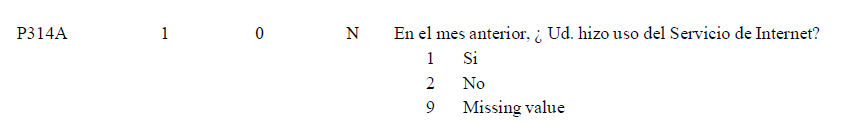

In [49]:
generar_tabla_recuento(base_filtrada, "p314d", "Ud., usa Internet al menos:",True, True) #¿Ud., usa Internet al menos: 1 Una vez al dia?
# 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?

,"Ud., usa Internet al menos:",Recuento,Porcentaje
0,1.0,"1,692,360",86.7
1,2.0,"248,146",12.7
2,3.0,"9,755",0.5
3,4.0,854,0.0
4,Total,"1,951,115",100.0


In [50]:
generar_tabla_recuento(base_filtrada, "p315a", "Monto de pago",True, True) #¿Ud., usa Internet al menos: 1 Una vez al dia?
# 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?

,Monto de pago,Recuento,Porcentaje
0,1.0,"2,497",4.5
1,2.0,"8,891",15.9
2,3.0,"2,948",5.3
3,4.0,"4,862",8.7
4,5.0,"13,277",23.8
5,6.0,774,1.4
6,7.0,676,1.2
7,8.0,"1,690",3.0
8,9.0,209,0.4
9,10.0,"10,352",18.5


In [51]:
generar_tabla_recuento(base_filtrada, "p315b", "Monto pago 2",True, True) #¿Ud., usa Internet al menos: 1 Una vez al dia?
# 2 Una vez a la semana? 3 Una vez al mes? 4 Cada 2 meses o más?

,Monto pago 2,Recuento,Porcentaje
0,1.0,782,39.5
1,3.0,396,20.0
2,17.0,79,4.0
3,20.0,481,24.3
4,30.0,244,12.3
5,Total,"1,983",100.0


## Dimensión de USO 2

### Acceso - Laptop

In [52]:
generar_tabla_recuento(base_filtrada, "i_laptop", "Uso del internet a traves de una LAPTOP", True, True)

,Uso del internet a traves de una LAPTOP,Recuento,Porcentaje
0,0.0,"3,880,969",90.8
1,2.0,"392,707",9.2
2,Total,"4,273,677",100.0


### Acceso - Computadora

In [53]:
generar_tabla_recuento(base_filtrada, "i_computadora", "Uso del internet a traves de una computadora",True, True)

,Uso del internet a traves de una computadora,Recuento,Porcentaje
0,0.0,"3,692,865",86.4
1,1.0,"580,812",13.6
2,Total,"4,273,677",100.0


### Acceso - Tablet

In [54]:
generar_tabla_recuento(base_filtrada, "i_tablet", "Uso del internet a traves de una TABLET",True, True)

,Uso del internet a traves de una TABLET,Recuento,Porcentaje
0,0.0,"4,174,996",97.7
1,6.0,"98,680",2.3
2,Total,"4,273,677",100.0


### Acceso - Otro

In [55]:
generar_tabla_recuento(base_filtrada, "i_otro", "Uso del internet a traves de una OTRO", True, True)

,Uso del internet a traves de una OTRO,Recuento,Porcentaje
0,0.0,"3,447,206",80.7
1,7.0,"826,470",19.3
2,Total,"4,273,676",100.0


### Acceso - Celular sin plan de datos

In [56]:
generar_tabla_recuento(base_filtrada, "i_cel_sdatos", "Uso del internet a traves de una CELULAR SIN PLAN DE DATOS",True, True)

,Uso del internet a traves de una CELULAR SIN PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"2,038,781",47.7
1,8.0,"2,234,896",52.3
2,Total,"4,273,676",100.0


### Acceso - Celular con plan de datos

In [57]:
generar_tabla_recuento(base_filtrada, "i_cel_cdatos", "Uso del internet a traves de una CELULAR CON PLAN DE DATOS",True,True)

,Uso del internet a traves de una CELULAR CON PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"3,423,683",80.1
1,9.0,"849,994",19.9
2,Total,"4,273,677",100.0


In [58]:
#generar_tabla_recuento(base_filtrada, "p314b1_5", "Uso del internet a traves de una CELULAR DE SU CENTRO DE TRABAJO", guardar_como_jpeg=True) 

## DIMENSION -APROPIACION

In [59]:
generar_tabla_recuento(base_filtrada, "i_obtener_info", "Usó el Internet para: Obtener información",True,True)

,Usó el Internet para: Obtener información,Recuento,Porcentaje
0,1.0,"1,606,055",82.3
1,2.0,"345,060",17.7
2,Total,"1,951,115",100.0


In [60]:
generar_tabla_recuento(base_filtrada, "i_comunicarse", "Usó el Internet para: Comunicarsen",True,True)

,Usó el Internet para: Comunicarsen,Recuento,Porcentaje
0,1.0,"1,664,750",85.3
1,2.0,"286,365",14.7
2,Total,"1,951,115",100.0


In [61]:
generar_tabla_recuento(base_filtrada, "i_comprar_pdts_ss", "Usó el Internet para: Comprar productos_servicios",True,True)

,Usó el Internet para: Comprar productos_servicios,Recuento,Porcentaje
0,1.0,"26,755",1.4
1,2.0,"1,924,360",98.6
2,Total,"1,951,115",100.0


In [62]:
generar_tabla_recuento(base_filtrada,'i_operaciones_bancarias', 'Usó el Internet para: Operaciones de banca electrónica', True, True)


,Usó el Internet para: Operaciones de banca electrónica,Recuento,Porcentaje
0,1.0,"6,961",0.4
1,2.0,"1,944,154",99.6
2,Total,"1,951,115",100.0


In [63]:
generar_tabla_recuento(base_filtrada, "i_edu_formal", "Usó el Internet para: Educación formal y actividades de capacitación",True,True)

,Usó el Internet para: Educación formal y actividades de capacitación,Recuento,Porcentaje
0,1.0,"539,368",27.6
1,2.0,"1,411,747",72.4
2,Total,"1,951,115",100.0


In [64]:
generar_tabla_recuento(base_filtrada, "i_transacciones", "Usó el Internet para: Transacciones",True,True)

,Usó el Internet para: Transacciones,Recuento,Porcentaje
0,1.0,"20,767",1.1
1,2.0,"1,930,348",98.9
2,Total,"1,951,115",100.0


In [65]:
generar_tabla_recuento(base_filtrada, "i_act_entretenimiento", "Usó el Internet para: Actividades de entretenimiento",True,True)

,Usó el Internet para: Actividades de entretenimiento,Recuento,Porcentaje
0,1.0,"1,504,413",77.1
1,2.0,"446,702",22.9
2,Total,"1,951,115",100.0


In [66]:
generar_tabla_recuento(base_filtrada, "i_vender_pdts", "Usó el Internet para: Vender productos_servicios",True,True)

,Usó el Internet para: Vender productos_servicios,Recuento,Porcentaje
0,1.0,"12,091",0.6
1,2.0,"1,939,024",99.4
2,Total,"1,951,115",100.0


In [67]:
generar_tabla_recuento(base_filtrada, "p316_9", "Usó el Internet para: Otro",True,True)

,Usó el Internet para: Otro,Recuento,Porcentaje
0,1.0,"19,350",1.0
1,2.0,"1,931,765",99.0
2,Total,"1,951,115",100.0


In [68]:
generar_tabla_recuento(base_filtrada, "p316_10", "Usó el Internet para: Otro2",True,True)

,Usó el Internet para: Otro2,Recuento,Porcentaje
0,1.0,314,0.0
1,2.0,"1,950,801",100.0
2,Total,"1,951,115",100.0


In [69]:
generar_tabla_recuento(base_filtrada, "p316_11", "Usó el Internet para: Otro3",True,True)

,Usó el Internet para: Otro3,Recuento,Porcentaje
0,2.0,"1,951,115",100.0
1,Total,"1,951,115",100.0


In [70]:
generar_tabla_recuento(base_filtrada, "i_descarga_antivirus", "Usó el Internet para: descarga de antivirus",True,True)

,Usó el Internet para: descarga de antivirus,Recuento,Porcentaje
0,1.0,"196,864",10.1
1,2.0,"1,754,251",89.9
2,Total,"1,951,115",100.0


## CLASES A DISTANCIA

In [71]:
# Cuenta los valores nulos en la columna "mi_columna"
nulos_en_columna = base_filtrada['clases_tv'].isnull().sum()

# Muestra el resultado
print("Cantidad de valores nulos en 'mi_columna':", nulos_en_columna)

Cantidad de valores nulos en 'mi_columna': 3557


In [72]:
generar_tabla_recuento(base_filtrada, "clases_tv", "Acceso al contenido de clase - TELEVISION",True, True)

,Acceso al contenido de clase - TELEVISION,Recuento,Porcentaje
0,0.0,"3,104,921",51.1
1,1.0,"2,970,516",48.9
2,Total,"6,075,437",100.0


In [73]:
generar_tabla_recuento(base_filtrada, "clases_radio", "Acceso al contenido de clase - RADIO",True, True)

,Acceso al contenido de clase - RADIO,Recuento,Porcentaje
0,0.0,"5,069,416",83.4
1,2.0,"1,006,021",16.6
2,Total,"6,075,437",100.0


In [74]:
generar_tabla_recuento(base_filtrada, "clases_plataforma_virtual", "Acceso al contenido de clase - PLATAFORMA VIRTUAL",True,True)

,Acceso al contenido de clase - PLATAFORMA VIRTUAL,Recuento,Porcentaje
0,0.0,"4,203,578",69.2
1,3.0,"1,871,859",30.8
2,Total,"6,075,437",100.0


In [75]:
generar_tabla_recuento(base_filtrada, "clases_otro", "Acceso al contenido de clase - OTRO",True,True)

,Acceso al contenido de clase - OTRO,Recuento,Porcentaje
0,0.0,"5,951,653",98.0
1,4.0,"123,784",2.0
2,Total,"6,075,437",100.0


In [76]:
generar_tabla_recuento(base_filtrada, "clases_wsp", "Acceso al contenido de clase - WHATSAPP",True,True)

,Acceso al contenido de clase - WHATSAPP,Recuento,Porcentaje
0,0.0,"2,043,578",33.6
1,5.0,"4,031,859",66.4
2,Total,"6,075,437",100.0


In [77]:
generar_tabla_recuento(base_filtrada, "clases_correo", "Acceso al contenido de clase - CORREO",True,True)

,Acceso al contenido de clase - CORREO,Recuento,Porcentaje
0,0.0,"5,877,302",96.7
1,6.0,"198,134",3.3
2,Total,"6,075,437",100.0


In [78]:
generar_tabla_recuento(base_filtrada, "clases_llamadas", "Acceso al contenido de clase - LLAMADAS",True,True)

,Acceso al contenido de clase - LLAMADAS,Recuento,Porcentaje
0,0.0,"4,335,639",71.4
1,7.0,"1,739,798",28.6
2,Total,"6,075,437",100.0


In [79]:
generar_tabla_recuento(base_filtrada, "clases_interaccion_profesor", "Acceso al contenido de clase - INTERACCION PROFESOR",True,True)

,Acceso al contenido de clase - INTERACCION PROFESOR,Recuento,Porcentaje
0,0.0,"2,321,377",38.2
1,1.0,"3,754,060",61.8
2,Total,"6,075,437",100.0


In [80]:
generar_tabla_recuento(base_filtrada, "clases_videos", "Acceso al contenido de clase - VIDEOS",True,True)

,Acceso al contenido de clase - VIDEOS,Recuento,Porcentaje
0,0.0,"2,622,708",43.2
1,2.0,"3,452,729",56.8
2,Total,"6,075,437",100.0


In [81]:
generar_tabla_recuento(base_filtrada, "clases_documentos", "Acceso al contenido de clase - DOCUMENTOS",True,True)

,Acceso al contenido de clase - DOCUMENTOS,Recuento,Porcentaje
0,0.0,"1,602,516",26.4
1,3.0,"4,472,920",73.6
2,Total,"6,075,437",100.0


In [82]:
generar_tabla_recuento(base_filtrada, "clases_otros", "Acceso al contenido de clase - OTROS",True,True)

,Acceso al contenido de clase - OTROS,Recuento,Porcentaje
0,0.0,"6,046,073",99.5
1,4.0,"29,364",0.5
2,Total,"6,075,437",100.0


In [83]:
generar_tabla_recuento(base_filtrada, "clases_msm_audio", "Acceso al contenido de clase - MENSAJES DE AUDIO",True,True)

,Acceso al contenido de clase - MENSAJES DE AUDIO,Recuento,Porcentaje
0,0.0,"3,765,520",62.0
1,5.0,"2,309,917",38.0
2,Total,"6,075,437",100.0


In [84]:
generar_tabla_recuento(base_filtrada, "clases_msm_texto", "Acceso al contenido de clase - MENSAJES DE TEXTO",True,True)

,Acceso al contenido de clase - MENSAJES DE TEXTO,Recuento,Porcentaje
0,0.0,"4,068,594",67.0
1,6.0,"2,006,843",33.0
2,Total,"6,075,437",100.0


In [85]:
generar_tabla_recuento(base_filtrada, "clases_sin_acompañamiento", "Acceso al contenido de clase - SIN ACOMPAÑAMIENTO",True,True)

,Acceso al contenido de clase - SIN ACOMPAÑAMIENTO,Recuento,Porcentaje
0,0.0,"5,917,262",97.4
1,7.0,"158,175",2.6
2,Total,"6,075,437",100.0


# Graficos

### V. Continuas - Miembros por hogar y Edad

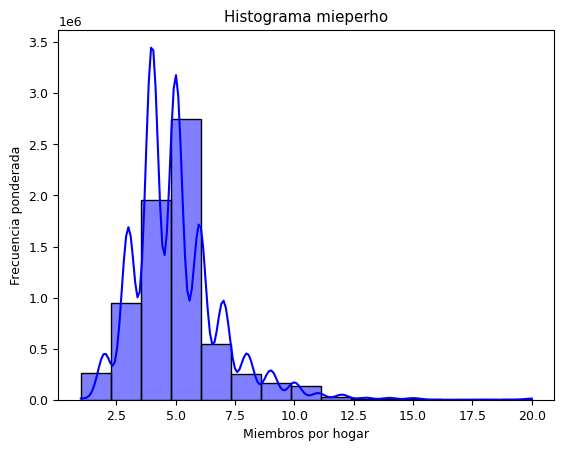

In [86]:
guardar_histograma_con_pesos(base_filtrada, 'mieperho','Miembros por hogar')

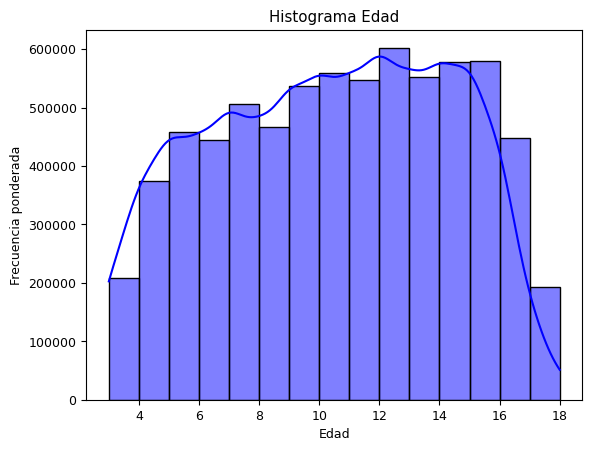

In [87]:
guardar_histograma_con_pesos(base_filtrada, 'Edad','Edad')

### V. Cualitativas - Nivel educativo y centro de estudios

#### Func. Graf de barras

In [88]:
def guardar_graf_barras(columna_categorica, labels):
    # Crear una paleta de colores personalizada para las categorías
    num_categories = len(labels)
    custom_palette = ["#4c72b0", "#dd8452", "#55a868", "#c44e52", "#8172b3","#937860", "#da8bc3", "#8c8c8c", "#ccb974", "#64b5cd",
    "#808000", "#000080", "#006400", "#808000", "#669966","#007777", "#000080", "#00008B", "#6699CC", "#ADD8E6","#8B0000", "#A52A2A", 
    "#800000", "#D2691E", "#FFD700",'#4c72b0'][:num_categories]

    # Crear el gráfico de barras
    ax = sns.barplot(x=columna_categorica, y='factor07', data=base_filtrada, estimator=sum, ci=None, palette=custom_palette)

    # Etiquetar las barras con los porcentajes
    total = base_filtrada['factor07'].sum()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{(height/total)*100:.0f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'estadistico_{columna_categorica}.png'

    # Eliminar etiquetas y marcas del eje y
    ax.set_yticks([])
    ax.set_yticklabels([])

    # Etiquetas y título
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Porcentaje de estudiante por {columna_categorica}')
    
    # Especificar el número de columnas en la leyenda (en este caso, 2 columnas)
    ncol = 2
    
    # Reducir el tamaño de fuente de la leyenda
    handles = [plt.Rectangle((0,0),1,1, color=col) for col in custom_palette[:len(labels)]]
    plt.legend(handles, labels, title='Leyenda', loc='upper left', fontsize=8, bbox_to_anchor=(1, 1), ncol=ncol)
    
    # Eliminar los spines derecho y superior
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

### Nivel educativo y centro de estudios

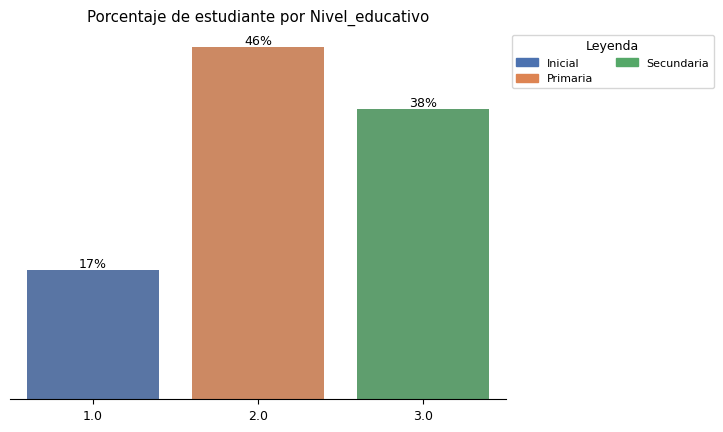

In [89]:
label = ["Inicial","Primaria","Secundaria"]
guardar_graf_barras('Nivel_educativo', labels = label)

In [90]:
# Notas

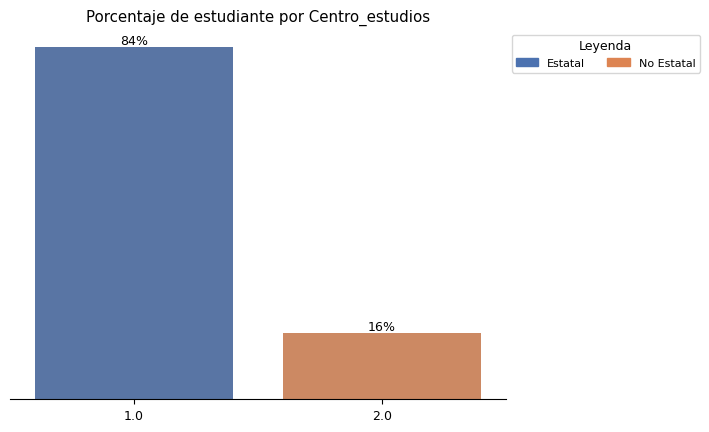

In [91]:
label = ["Estatal","No Estatal"]
guardar_graf_barras('Centro_estudios', labels = label)

### V.C. Idioma y Sexo

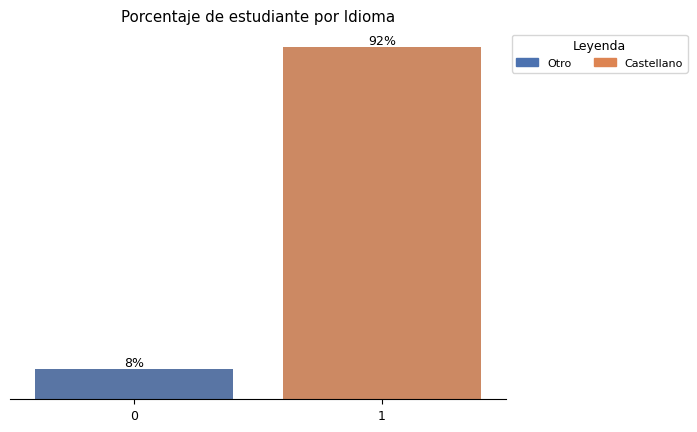

In [92]:
label = ["Otro","Castellano"]
guardar_graf_barras('Idioma', labels = label)

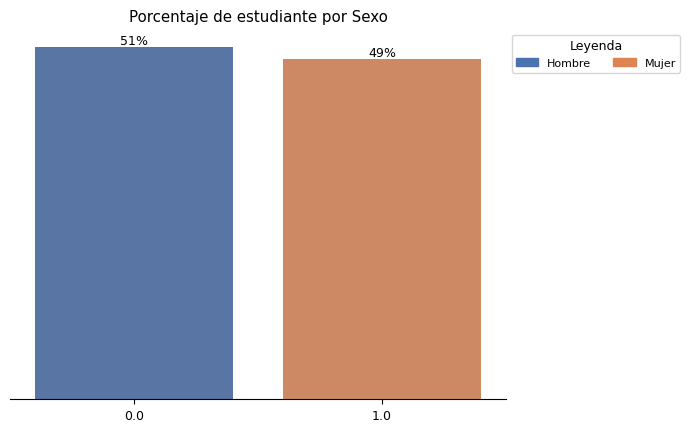

In [93]:
label= ["Hombre","Mujer"]
guardar_graf_barras('Sexo', label)

### Area y Estrato Social

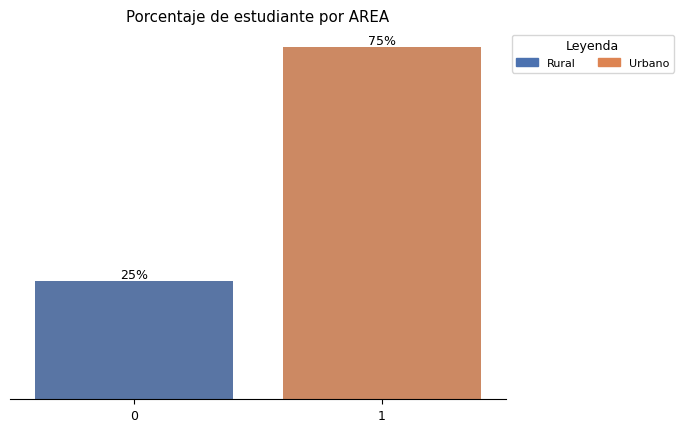

In [94]:
label = ["Rural", "Urbano"]
#guardar_graf_barras('AREA', label = labels)
guardar_graf_barras('AREA', label)

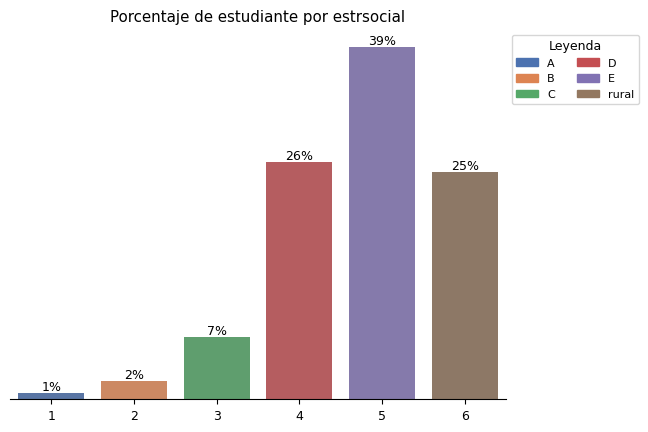

In [95]:
label = ["A", "B","C","D", "E","rural"]
guardar_graf_barras('estrsocial',label)

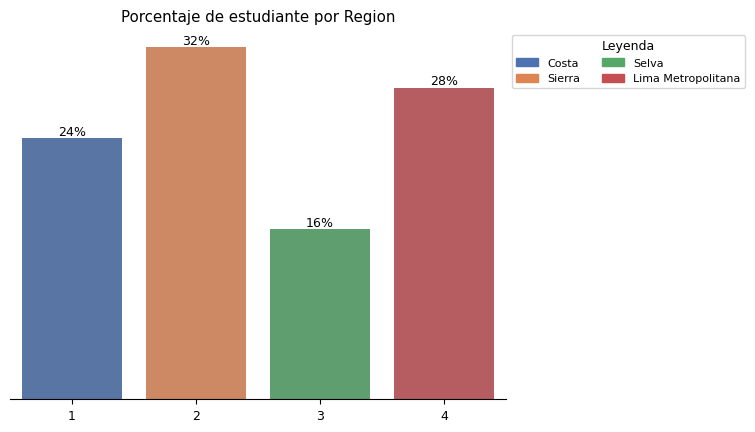

In [96]:
label = ["Costa", "Sierra","Selva","Lima Metropolitana"]
guardar_graf_barras('Region',label)

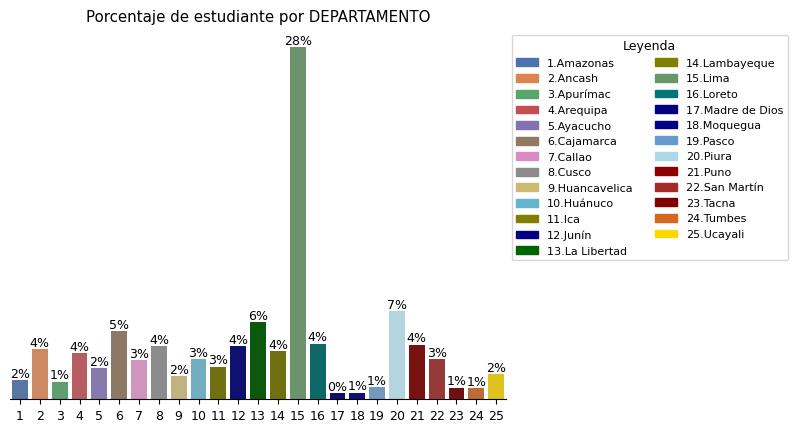

In [97]:
label = ["1.Amazonas","2.Ancash","3.Apurímac","4.Arequipa","5.Ayacucho","6.Cajamarca","7.Callao","8.Cusco","9.Huancavelica","10.Huánuco",
          "11.Ica","12.Junín","13.La Libertad","14.Lambayeque","15.Lima","16.Loreto", "17.Madre de Dios","18.Moquegua","19.Pasco",
         "20.Piura", "21.Puno","22.San Martín", "23.Tacna","24.Tumbes","25.Ucayali"]
guardar_graf_barras('DEPARTAMENTO', label)

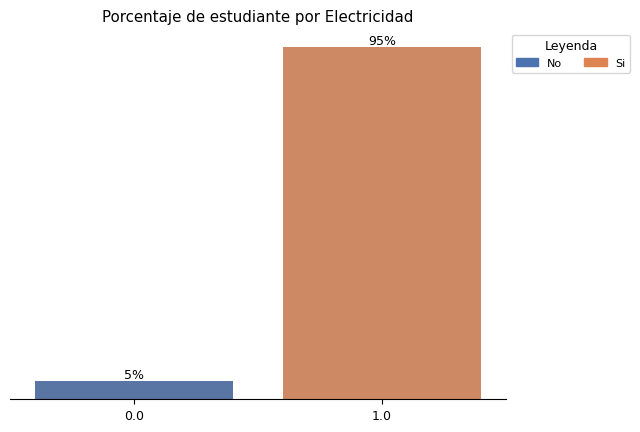

In [98]:
label = ["No","Si"]
guardar_graf_barras('Electricidad', label)

In [99]:
base_filtrada_ = base_filtrada.copy()

### Grafico de barras - USO

In [100]:
base_filtrada_['i_uso'] = base_filtrada_['i_uso'].map({2: 0, 1: 1})
base_filtrada_['i_uso_cedu'] = base_filtrada_['i_uso_cedu'].map({0: 0, 3: 1})
base_filtrada_['i_uso_trab'] = base_filtrada_['i_uso_trab'].map({0: 0, 2: 1})
base_filtrada_['i_uso_hog'] = base_filtrada_['i_uso_hog'].map({0: 0, 1: 1})
base_filtrada_['i_uso_cab'] = base_filtrada_['i_uso_cab'].map({0: 0, 4: 1})
base_filtrada_['i_uso_casotr'] = base_filtrada_['i_uso_casotr'].map({0: 0, 5: 1})
base_filtrada_['i_uso_otro'] = base_filtrada_['i_uso_otro'].map({0: 0, 6: 1})
base_filtrada_['i_uso_movil'] = base_filtrada_['i_uso_movil'].map({0: 0, 7: 1})

### Funcion

In [101]:
def barras(variable):
    freq_1 = base_filtrada_[[ "factor07",variable]].groupby([variable]).sum().reset_index()
    total_recuento = freq_1['factor07'].sum()
    freq_1['Porcentaje'] = (freq_1['factor07'] / total_recuento * 100).round(2)
    freq_1.rename(columns={variable: 'variable','factor07': 'value'}, inplace=True)
    freq_1 =  freq_1.tail(1)
    freq_1['variable'] = freq_1['variable'].replace(1.0, variable)
    freq_1['value'] = freq_1['value'].apply(lambda x: '{:,.0f}'.format(x))
    #freq_1['Porcentaje'] = freq_1['Porcentaje'].apply(lambda x: '{:.3f}'.format(x))
    
    return freq_1

### Otro

In [102]:
i_uso= barras("i_uso")
i_uso_cedu = barras("i_uso_cedu")
i_uso_trab = barras("i_uso_trab")
i_uso_hog = barras("i_uso_hog")
i_uso_cab = barras("i_uso_cab")
i_uso_casotr = barras("i_uso_casotr")
i_uso_otro = barras("i_uso_otro")
i_uso_movil = barras("i_uso_movil")

In [103]:
data3 = pd.concat([i_uso_cedu, i_uso_trab, i_uso_hog, i_uso_cab, i_uso_casotr,i_uso_otro, i_uso_movil], axis=0)
#data3 = pd.concat([i_uso, i_uso_cedu, i_uso_trab, i_uso_hog, i_uso_cab, i_uso_casotr,i_uso_otro, i_uso_movil], axis=0)
data3 = data3.reset_index(drop=True)
data3

,variable,value,Porcentaje
0,i_uso_cedu,"4,436",0.230000
1,i_uso_trab,"2,907",0.150000
2,i_uso_hog,"490,830",25.160000
3,i_uso_cab,"57,794",2.960000
4,i_uso_casotr,"40,755",2.090000
5,i_uso_otro,"22,055",1.130000
6,i_uso_movil,"1,687,514",86.489998


## plot

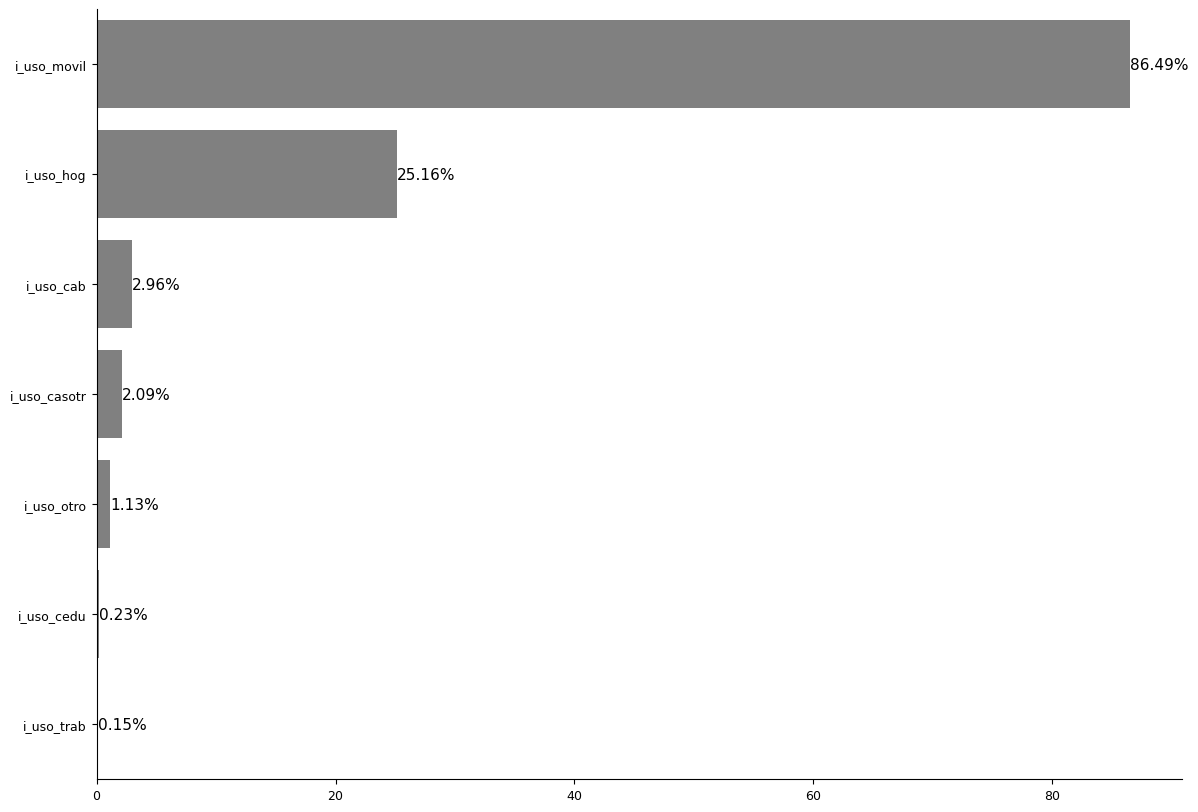

In [104]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)
# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiples_uso.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)
plt.show()

### Grafico de barras - ACCESO

In [105]:
base_filtrada_['i_computadora'] = base_filtrada_['i_computadora'].map({0: 0, 1: 1})
base_filtrada_['i_tablet'] = base_filtrada_['i_tablet'].map({0: 0, 6: 1})
base_filtrada_['i_laptop'] = base_filtrada_['i_laptop'].map({0: 0, 2: 1})
base_filtrada_['i_otro'] = base_filtrada_['i_otro'].map({0: 0, 7: 1})
base_filtrada_['i_cel_sdatos'] = base_filtrada_['i_cel_sdatos'].map({0: 0, 8: 1})
base_filtrada_['i_cel_cdatos'] = base_filtrada_['i_cel_cdatos'].map({0: 0, 9: 1})

In [106]:
i_computadora = barras("i_computadora")
i_tablet = barras("i_tablet")
i_laptop = barras("i_laptop")
i_otro = barras("i_otro")
i_cel_sdatos = barras("i_cel_sdatos")
i_cel_cdatos = barras("i_cel_cdatos")

In [107]:
data3 = pd.concat([i_computadora, i_tablet, i_laptop, i_otro, i_cel_sdatos, i_cel_cdatos], axis=0)
data3 = data3.reset_index(drop=True)
data3

,variable,value,Porcentaje
0,i_computadora,"580,812",13.590000
1,i_tablet,"98,680",2.310000
2,i_laptop,"392,707",9.190000
3,i_otro,"826,470",19.340000
4,i_cel_sdatos,"2,234,896",52.290001
5,i_cel_cdatos,"849,994",19.889999


## Plot

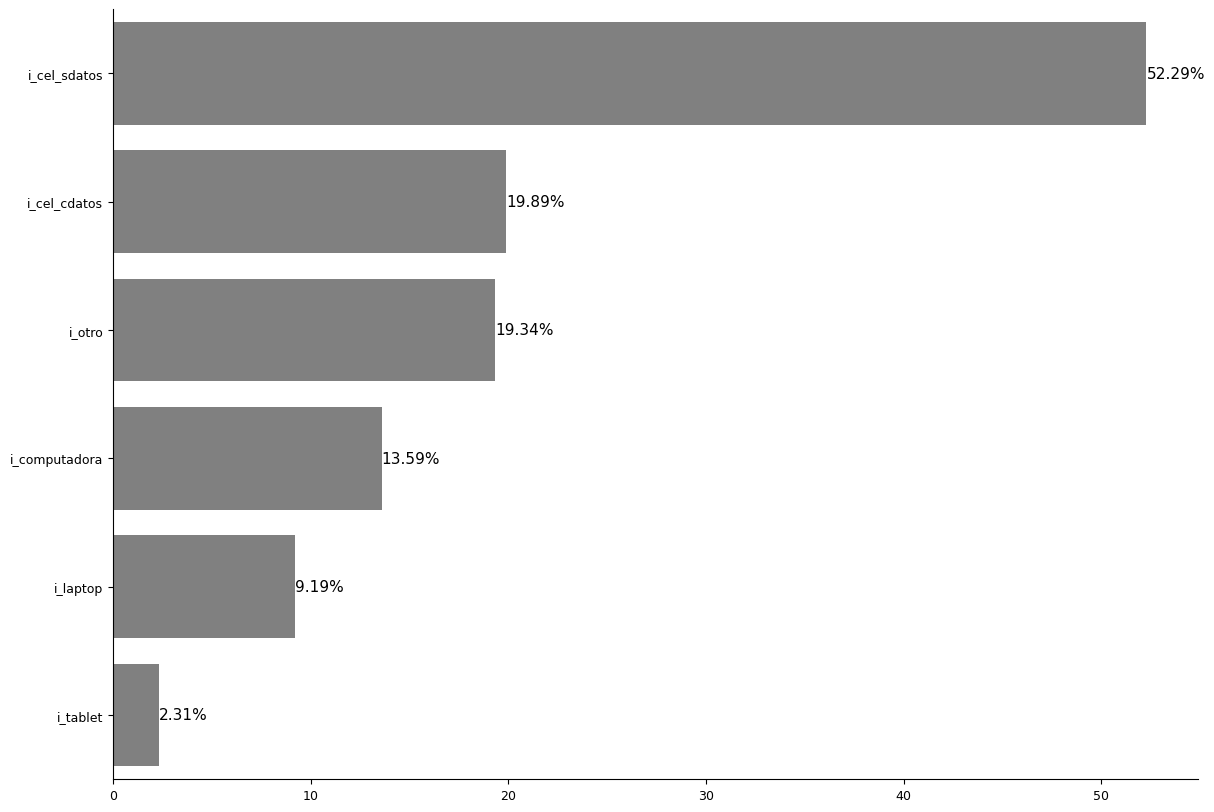

In [108]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)
# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiples_acceso.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)

plt.show()

### Grafico de barras - Clases a DISTANCIA

In [109]:
base_filtrada_['clases_tv'] = base_filtrada_['clases_tv'].map({0: 0, 1: 1})
base_filtrada_['clases_radio'] = base_filtrada_['clases_radio'].map({0: 0, 2: 1})
base_filtrada_['clases_plataforma_virtual'] = base_filtrada_['clases_plataforma_virtual'].map({0: 0, 3: 1})
base_filtrada_['clases_otro'] = base_filtrada_['clases_otro'].map({0: 0, 4: 1})
base_filtrada_['clases_wsp'] = base_filtrada_['clases_wsp'].map({0: 0, 5: 1})
base_filtrada_['clases_correo'] = base_filtrada_['clases_correo'].map({0: 0, 6: 1})
base_filtrada_['clases_llamadas'] = base_filtrada_['clases_llamadas'].map({0: 0, 7: 1})

In [110]:
base_filtrada_['clases_interaccion_profesor'] = base_filtrada_['clases_interaccion_profesor'].map({0: 0, 1: 1})
base_filtrada_['clases_videos'] = base_filtrada_['clases_videos'].map({0: 0, 2: 1})
base_filtrada_['clases_documentos'] = base_filtrada_['clases_documentos'].map({0: 0, 3: 1})
base_filtrada_['clases_otros'] = base_filtrada_['clases_otros'].map({0: 0, 4: 1})
base_filtrada_['clases_msm_audio'] = base_filtrada_['clases_msm_audio'].map({0: 0, 5: 1})
base_filtrada_['clases_msm_texto'] = base_filtrada_['clases_msm_texto'].map({0: 0, 6: 1})
base_filtrada_['clases_sin_acompañamiento'] = base_filtrada_['clases_sin_acompañamiento'].map({0: 0, 7: 1})

In [111]:
clases_tv         =   barras("clases_tv")
clases_radio      = barras("clases_radio")
clases_plataforma_virtual = barras("clases_plataforma_virtual")
clases_otro       = barras("clases_otro")
clases_wsp        = barras("clases_wsp")
clases_correo     = barras("clases_correo")
clases_llamadas   = barras("clases_llamadas")
clases_interaccion_profesor = barras("clases_interaccion_profesor")
clases_videos     = barras("clases_videos")
clases_documentos = barras("clases_documentos")
clases_otros      = barras("clases_otros")
clases_msm_audio  = barras("clases_msm_audio")
clases_msm_texto  = barras("clases_msm_texto")
clases_sin_acompañamiento = barras("clases_sin_acompañamiento")

In [112]:
data3 = pd.concat([clases_tv, clases_radio, clases_plataforma_virtual, clases_otro, clases_wsp, clases_correo, clases_llamadas,
                   clases_interaccion_profesor, clases_videos, clases_documentos, clases_otros, clases_msm_audio, clases_msm_texto,
                   clases_sin_acompañamiento], axis=0)
data3 = data3.reset_index(drop=True)
data3

,variable,value,Porcentaje
0,clases_tv,"2,970,516",48.889999
1,clases_radio,"1,006,021",16.559999
2,clases_plataforma_virtual,"1,871,859",30.809999
3,clases_otro,"123,784",2.040000
4,clases_wsp,"4,031,859",66.360001
5,clases_correo,"198,134",3.260000
6,clases_llamadas,"1,739,798",28.639999
7,clases_interaccion_profesor,"3,754,060",61.790001
8,clases_videos,"3,452,729",56.830002
9,clases_documentos,"4,472,920",73.620003


## plot

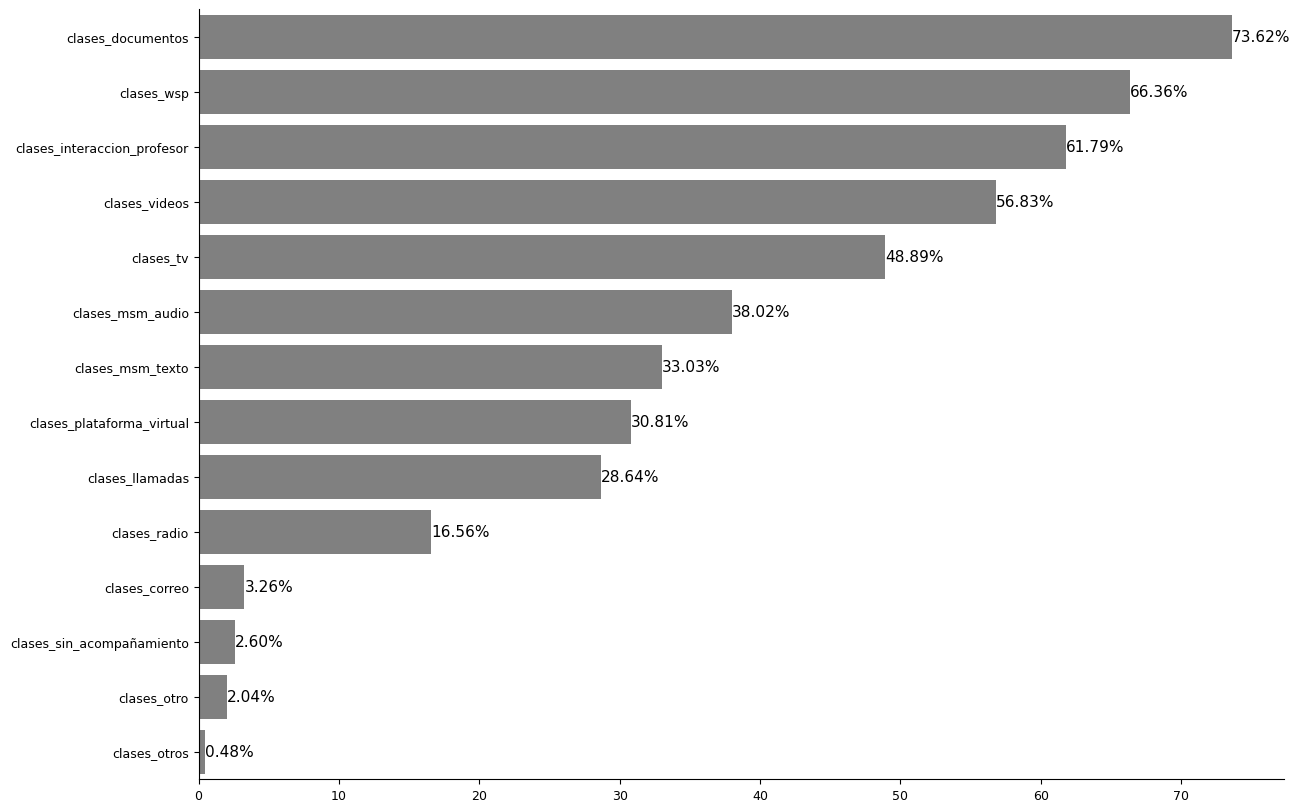

In [113]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)

# Etiquetas y título
plt.xlabel('')
plt.ylabel('')

# Eliminar los spines derecho y superior
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=11)

# Generar el nombre del archivo de imagen basado en el nombre de la columna
nombre_archivo = f'multiple_clases.png'

# Guardar la imagen en la ruta especificada
ruta_guardado = '../output/images/' + nombre_archivo
plt.savefig(ruta_guardado)

plt.show()

# Regresión

In [114]:
base_filtrada['i_uso_hog'].value_counts()
missing_values = base_filtrada['i_uso_hog'].isna().sum()
print("Número de valores faltantes en 'i_uso_hog':", missing_values)

Número de valores faltantes en 'i_uso_hog': 20647


In [115]:
base_filtrada.shape

(26899, 90)

In [116]:
base_filtrada = base_filtrada.dropna(subset=['i_uso_hog'])
weights = base_filtrada['factor07']

In [117]:
# Definir las variables dependientes, independientes y los pesos
y = base_filtrada['i_uso_hog']
X = base_filtrada[['mieperho','Nivel_educativo','Centro_estudios','Idioma','Sexo','AREA','estrsocial','Edad',
                   'Electricidad'
                  ## 'region'
                  ]] 
#X = base_filtrada[['mieperho','p308a','p308d','p300a','p207','AREA','estrsocial','p208a','p1121']]  # Agrega aquí tus otras variables independientes


In [118]:
# los nombres de las variables deben respresentar al menos una idea de lo que represento
# Revisar qué variables son categoricas y continuas 


In [119]:
# Define la variable dependiente (binaria) y las variables independientes
y = base_filtrada['i_uso_hog']
X = base_filtrada[['mieperho', 'Nivel_educativo', 'Centro_estudios', 'Idioma', 'Sexo', 'AREA', 'estrsocial', 'Edad', 'Electricidad']]

# Codifica la variable categórica ordinal "Nivel_educativo" en variables dummy
nivel_educativo_dummies = pd.get_dummies(base_filtrada['Nivel_educativo'], prefix='Nivel_educativo', drop_first=True)

# Codifica la variable categórica nominal "Region" en variables dummy
region_dummies = pd.get_dummies(base_filtrada['Region'], prefix='Region', drop_first=True)

# Codifica la variable categórica nominal "Region" en variables dummy
departamento_dummies = pd.get_dummies(base_filtrada['DEPARTAMENTO'], prefix='DEPARTAMENTO', drop_first=True)

# Combina las variables dummy con el conjunto de variables independientes
X = pd.concat([X, nivel_educativo_dummies, region_dummies, departamento_dummies], axis=1)

## Regresión Lineal SIMPLE

In [120]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              i_uso_hog   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     73.99
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:53:29   Log-Likelihood:                -2328.1
No. Observations:                6252   AIC:                             4732.
Df Residuals:                    6214   BIC:                             4988.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
mieperho               -0.0004    

## Modelo Logit

## Modelo Probit

In [121]:
# Agregar una constante al conjunto de datos (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo Probit ponderado
model_probit = sm.Probit(y, X, weights=weights)
results_probit = model_probit.fit()

# Imprimir los resultados del modelo Probit
print(results_probit.summary())

# Calcula los efectos marginales
efectos_marginales = results_probit.get_margeff()
print(efectos_marginales.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


         Current function value: 0.380601
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:              i_uso_hog   No. Observations:                 6252
Model:                         Probit   Df Residuals:                     6214
Method:                           MLE   Df Model:                           37
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                  0.2958
Time:                        20:53:30   Log-Likelihood:                -2379.5
converged:                      False   LL-Null:                       -3378.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.5519        nan        nan        nan         nan         nan
mieperho               -0.0045      0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


       Probit Marginal Effects       
Dep. Variable:              i_uso_hog
Method:                          dydx
At:                           overall
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
mieperho               -0.0010      0.003     -0.358      0.720      -0.006       0.004
Nivel_educativo        -0.1630        nan        nan        nan         nan         nan
Centro_estudios         0.1986      0.009     21.408      0.000       0.180       0.217
Idioma                  0.0920      0.035      2.629      0.009       0.023       0.161
Sexo                    0.0186      0.009      2.120      0.034       0.001       0.036
AREA                    0.0692      0.018      3.877      0.000       0.034       0.104
estrsocial             -0.0734      0.004    -16.878      0.000      -0.082      -0.065
Edad                 -9.91e-05      0.003     -0.037    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_margins.py:343: RuntimeWarning: invalid value encountered in sqrt
  return cov_me, np.sqrt(np.diag(cov_me))


In [122]:
import pandas as pd
from survey import SurveyDesign

# Cargar tu conjunto de datos en un DataFrame de pandas (reemplaza 'enaho.csv' con el nombre de tu archivo)
enaho = pd.read_csv('enaho.csv')

# Crear el diseño de encuesta
encuesta = SurveyDesign(
    data=enaho,
    ids=~enaho['conglome'],
    strata=~enaho['estrato.x'],
    weights=~enaho['facpob07']
)

# Realizar análisis de encuesta utilizando el diseño creado
# Por ejemplo, puedes calcular estimaciones de totales o medias ponderadas
estimacion_total = encuesta.mean("variable_de_interes")
print("Estimación del total ponderado:", estimacion_total)


ModuleNotFoundError: No module named 'survey'